In [37]:
import json
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import json
import pandas as pd
import plotly.graph_objects as go

In [82]:
data = pd.read_csv('climatehoax_extended.csv')
data.shape

(9315, 11)

In [85]:
data['author_username'] = data.author.apply(lambda x: json.loads(x)['username'])
id_username = {row['author_id']: json.loads(row['author'])['username'] for i, row in data.iterrows()}
data['in_reply_to_user_name'] = data.in_reply_to_user_id.apply(lambda x: id_username[x] if x in id_username else 'unknown')
data

,id,text,created_at,author_id,in_reply_to_user_id,lang,author,entities,referenced_tweets,media,geo,author_username,in_reply_to_user_name
0,1223027619748286464,RT @ThiagoMaia2503: The ice of the Svalbard se...,2020-01-30T23:38:01.000Z,781531692,NaN,en,"{""protected"":false,""id"":""781531692"",""url"":"""",""...","{""mentions"":[{""start"":3,""end"":18,""username"":""T...","[{""type"":""retweeted"",""id"":""1222932034064134145...",NaN,NaN,clevesque17,unknown
1,1223021903658377216,@mgrant76308 Go back to school is freezing out...,2020-01-30T23:15:19.000Z,139322897,6.185148e+07,en,"{""protected"":false,""id"":""139322897"",""url"":"""",""...","{""mentions"":[{""start"":0,""end"":12,""username"":""m...","[{""type"":""replied_to"",""id"":""122301755971853517...",NaN,NaN,ProfGIGISCICCH,unknown
2,1223017455188090881,Remember what is happening behind the curtain:...,2020-01-30T22:57:38.000Z,1216561117960511491,NaN,en,"{""protected"":false,""id"":""1216561117960511491"",...","{""hashtags"":[{""start"":158,""end"":175,""tag"":""Cli...",NaN,NaN,NaN,basedclimate,unknown
3,1223014846976757760,"""Global Warming""\n\n🙄\n\n#ClimateChange\n#Clim...",2020-01-30T22:47:16.000Z,573935794,NaN,en,"{""protected"":false,""id"":""573935794"",""url"":""htt...","{""hashtags"":[{""start"":21,""end"":35,""tag"":""Clima...","[{""type"":""quoted"",""id"":""1222793555464290304"",""...",NaN,NaN,ispyradio,unknown
4,1223012516084830208,RT @MannixZegge: Het merk Greta.... Nuff said....,2020-01-30T22:38:00.000Z,2447038212,NaN,nl,"{""protected"":false,""id"":""2447038212"",""url"":"""",...","{""hashtags"":[{""start"":49,""end"":61,""tag"":""Clima...","[{""type"":""retweeted"",""id"":""1223011624249892864...",NaN,NaN,Aethonaia,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9310,1222898675896082435,@johnshaplin @yanisvaroufakis @ProSyn This fro...,2020-01-30T15:05:39.000Z,867077976210513920,2.213013e+09,en,"{""location"":""Always QUESTION "",""url"":"""",""usern...","{""annotations"":[{""start"":95,""end"":100,""probabi...","[{""type"":""replied_to"",""id"":""122269192433694720...",NaN,NaN,insane_voice,unknown
9311,1222891218226446338,"@jk_eaton No shit, Sherlock. Greta, koalas &am...",2020-01-30T14:36:01.000Z,867077976210513920,7.596459e+08,en,"{""location"":""Always QUESTION "",""url"":"""",""usern...","{""annotations"":[{""start"":19,""end"":26,""probabil...","[{""type"":""replied_to"",""id"":""122288953361377280...",NaN,NaN,insane_voice,unknown
9312,1222889509232267265,Energy and Commerce Chairman Frank Pallone Jr....,2020-01-30T14:29:13.000Z,75184478,7.518448e+07,en,"{""entities"":{""url"":{""urls"":[{""start"":0,""end"":2...","{""annotations"":[{""start"":29,""end"":45,""probabil...","[{""type"":""replied_to"",""id"":""122288909340055142...",NaN,NaN,warriors_mom,warriors_mom
9313,1222880284439302144,Are you one of the #UNEP's 50 million #climate...,2020-01-30T13:52:34.000Z,1179690892854099973,NaN,en,"{""entities"":{""url"":{""urls"":[{""start"":0,""end"":2...","{""urls"":[{""start"":192,""end"":215,""url"":""https:/...",NaN,"[{""type"":""photo"",""height"":1699,""media_key"":""3_...",NaN,ExtinctionClock,unknown


In [87]:
data.dropna(subset=['in_reply_to_user_id'], inplace=True)

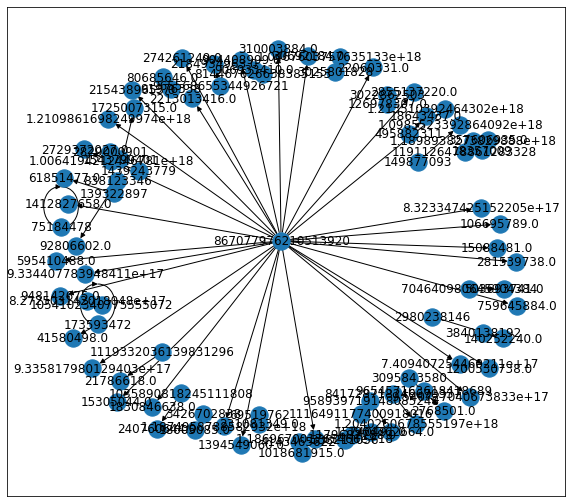

In [88]:
graph = nx.from_pandas_edgelist(data[:100], source = 'author_id', target = 'in_reply_to_user_id',
        edge_attr = 'lang', create_using = nx.DiGraph())
plt.figure(figsize = (10,9))
nx.draw_networkx(graph, with_labels=True)
plt.show()

In [94]:
print(nx.info(graph))

DiGraph with 88 nodes and 62 edges


C:\Users\Faeze\AppData\Local\Temp\ipykernel_11064\1946503012.py:1: DeprecationWarning:

info is deprecated and will be removed in version 3.0.




In [93]:
edge_x = []
edge_y = []
for edge in graph.edges():
    print(graph.nodes[edge[0]])
    x0, y0 = graph.nodes[edge[0]]['pos']
    x1, y1 = graph.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in graph.nodes():
    x, y = graph.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

{}


KeyError: 'pos'

In [12]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

NameError: name 'edge_trace' is not defined